<a href="https://colab.research.google.com/github/evasseva/evasseva/blob/main/1st_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
modelpath = "./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [6]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.07932, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07932 to 0.06038, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06038 to 0.04912, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04912 to 0.04371, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04371 to 0.04239, saving model to ./MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04239

Epoch 7: val_loss improved from 0.04239 to 0.03976, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.03976 to 0.03950, saving model to ./MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.03950

Epoch 10: val_loss did not improve from 0.03950

Epoch 11: val_loss did not improve from 0.03950

Epoch 12: val_loss improved from 0.03950 to 0.03748, saving model to ./MNIST_CNN.hdf5

Epoch 13: val_loss did not improve from 0.03748

Epoch 14: val_loss did not improve from 0.03748

Epoch 15: val_loss did

In [7]:
print("\n Test Accuracy: %.4f"%(model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 7s 22ms/step - loss: 0.0310 - accuracy: 0.9924

 Test Accuracy: 0.9924


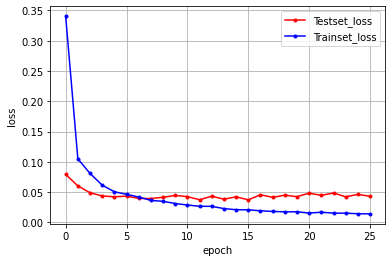

In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()